In [44]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1 

Create a list of 4 students around you. Add 'test' name to the end of the list and sort the list in the reverse alphabetical order.  

In [45]:
student_names = ['Leo','Shawn','Logan','Juyoung']
student_names

['Leo', 'Shawn', 'Logan', 'Juyoung']

In [46]:
student_names.append('test')
student_names

['Leo', 'Shawn', 'Logan', 'Juyoung', 'test']

In [47]:
student_names.sort(reverse=True)
student_names

['test', 'Shawn', 'Logan', 'Leo', 'Juyoung']

## Exercise 2

Write a function to find the maximum value in a given list with and without using recursion 


In [52]:
def maxnor(mylist):
    max_nor = mylist[0]
    for i in range(1,len(mylist)):
        if mylist[i] > max_nor:
            max_nor = mylist[i]
    return max_nor

In [56]:
input_list = [4,10,20,45, 100.0]
maxnor(input_list)

100.0

In [54]:
def maxr(mylist):
    m1 = mylist[0]
    if len(mylist)>1:
        m2 = maxr(mylist[1:])
    else: 
        return m1
    if m1>m2:
        return m1
    else:
        return m2

In [55]:
maxr(input_list)

45

## Exercise 3

Write a class to introduce yourself printing your name and hobbies

In [65]:
class Person:
    def __init__(self,name,hobbies):
        self.name = name
        self.hobbies = hobbies
    def introduce(self):
        print(f'Hi! My name is {self.name}.')
        print(f'My Hobbies are : {','.join(self.hobbies)}')

In [67]:
person_to_introduce = Person('Shachi',['Spending time with my son', 'exploring nature','music'])
person_to_introduce.introduce()

Hi! My name is Shachi.
My Hobbies are : Spending time with my son,exploring nature,music


In [68]:
# reading a csv file using pandas
data = pd.read_csv('materials.csv')

Analysing material properties particularly Mohs Hardness

- `allelectrons_Total`: Total number of electrons
- `density_Total`: Total elemental density
- `allelectrons_Average`: Atomic average number of electrons
- `val_e_Average`: Atomic average number of valence electrons
- `atomicweight_Average`: Atomic average atomic weight
- `ionenergy_Average`: Atomic average first IE
- `el_neg_chi_Average`: Atomic average Pauling electronegativity of the most common oxidation state
- `R_vdw_element_Average`: Atomic average van der Waals atomic radius
- `R_cov_element_Average`: Atomic average covalent atomic radius
- `zaratio_Average`: Atomic average atomic number to mass number ratio
- `density_Average`: Atomic average elemental density

In [69]:
data.set_index('id', inplace=True)

In [70]:
data.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,,
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


#### Data Grouping

pd.cut:Discretizes continuous data into bins or categories. 
groupby:Groups data based on the values of one or more columns, enabling aggregation, transformation, and filtering operations on those groups.

In [71]:
data['hardness_group'] = pd.cut(data['Hardness'], 4) #bins=[0, 2.5, 4, 5.5, 7])
data.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness,hardness_group
id,,,,,,,,,,,,,
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0,"(5.5, 7.75]"
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5,"(5.5, 7.75]"
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5,"(0.991, 3.25]"
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0,"(5.5, 7.75]"
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0,"(5.5, 7.75]"


In [72]:
null_count = data['hardness_group'].isnull().sum()
print(f"Number of null values in column 'hardness_group': {null_count}") 


Number of null values in column 'hardness_group': 0


In [7]:
pd.Series(data['hardness_group']).value_counts()

hardness_group
(3.25, 5.5]      3796
(5.5, 7.75]      3596
(0.991, 3.25]    2827
(7.75, 10.0]      188
Name: count, dtype: int64

In [73]:
#data.groupby(['hardness_group']).mean()
data.groupby(['hardness_group'], observed=True).mean()



,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
hardness_group,,,,,,,,,,,,
"(0.991, 3.25]",152.223393,18.821277,23.765146,4.411462,54.352155,10.501204,2.468007,1.756065,0.999828,0.486067,3.223859,2.397984
"(3.25, 5.5]",125.422335,13.523065,15.490231,4.514364,33.617883,11.058684,2.621814,1.723959,0.933039,0.500164,1.900726,4.670337
"(5.5, 7.75]",114.522776,12.432111,13.681503,4.688485,29.125745,11.151916,2.701821,1.720644,0.914094,0.491752,1.567406,6.179905
"(7.75, 10.0]",76.544261,8.320307,11.069553,4.526101,23.082241,10.994770,2.620893,1.712611,0.905165,0.495770,1.237040,8.680851


In [74]:
data.groupby(['hardness_group'],observed=True)['allelectrons_Total'].describe()


,count,mean,std,min,25%,50%,75%,max
hardness_group,,,,,,,,
"(0.991, 3.25]",2827.0,152.223393,367.689833,0.000,74.0,100.0,180.0,15300.0
"(3.25, 5.5]",3796.0,125.422335,173.753803,0.000,60.0,92.0,128.0,3328.0
"(5.5, 7.75]",3596.0,114.522776,78.999344,0.000,72.0,100.0,126.0,1030.0
"(7.75, 10.0]",188.0,76.544261,65.481474,0.001,42.5,70.0,96.0,522.0


In [20]:
data['Hardness'].mean

<bound method Series.mean of id
0        6.0
1        6.5
2        2.5
3        6.0
4        6.0
        ... 
10402    4.0
10403    5.0
10404    1.8
10405    6.0
10406    6.5
Name: Hardness, Length: 10407, dtype: float64>

### Data Visualization

In [31]:
#### Scatter Plots 


In [75]:
df = data.sample(500, random_state=200)

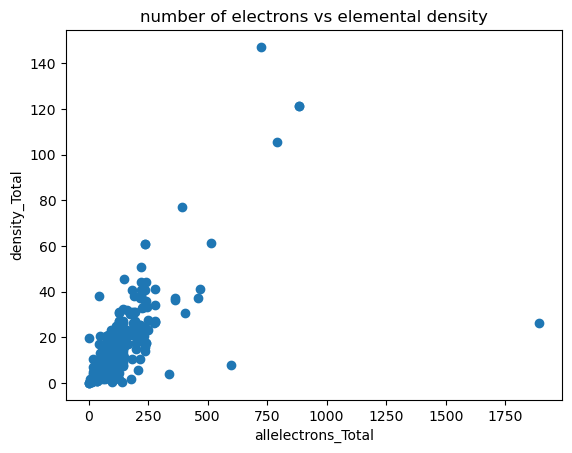

In [76]:
# plotting with python 
plt.scatter(df['allelectrons_Total'], df['density_Total'])
#asthetics
plt.xlabel('allelectrons_Total')
plt.ylabel('density_Total')
plt.title('number of electrons vs elemental density')
#Show the plot
plt.show()

Text(0.5, 1.0, 'number of electrons vs elemental density')

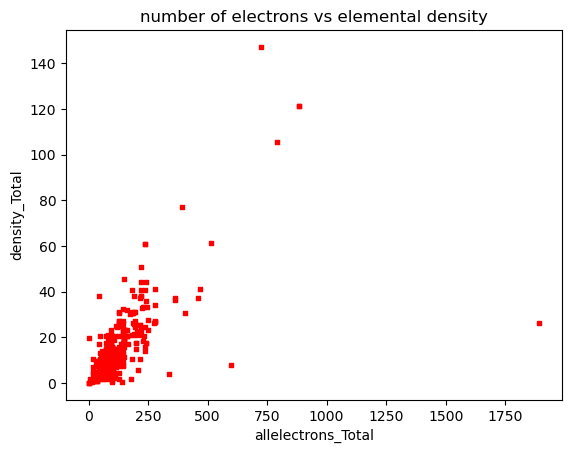

In [77]:
#changing the color of the markers,marker type and size
# plotting with python 
plt.scatter(df['allelectrons_Total'], df['density_Total'], color = 'red',marker='s', s=10)
#asthetics
plt.xlabel('allelectrons_Total')
plt.ylabel('density_Total')
plt.title('number of electrons vs elemental density')

<Axes: xlabel='allelectrons_Total', ylabel='density_Total'>

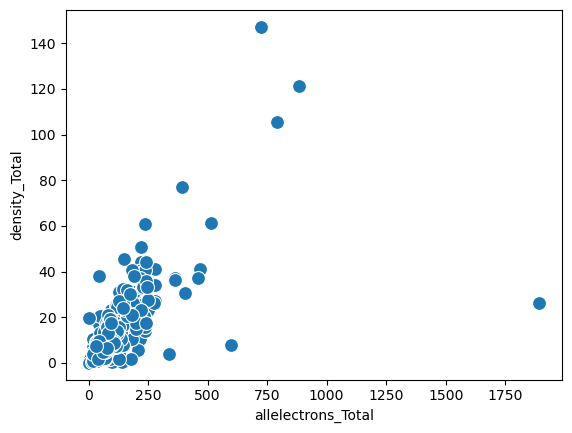

In [79]:
import seaborn as sns
sns.scatterplot(data = df, x='allelectrons_Total', y = 'density_Total', s= 100)


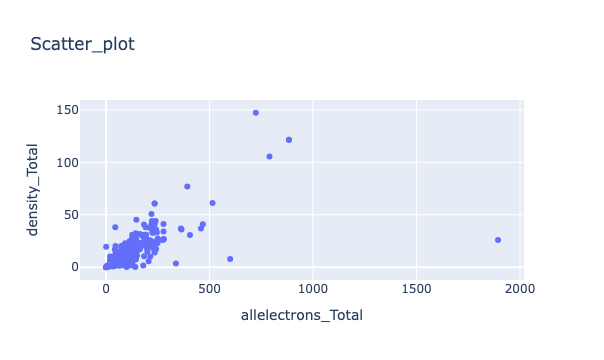

In [80]:
import plotly.express as px 
fig = px.scatter(df, x='allelectrons_Total', y = 'density_Total',
                 title = 'Scatter_plot',
                 labels = {'Tital_electrons','Total_density'})
fig.show()

In [81]:
df_new = df.drop('hardness_group',axis =1)

In [85]:
import altair as alt
chart = alt.Chart(df_new).mark_circle(size = 60, opacity = 0.6).encode(
    x = alt.X('allelectrons_Total:Q', title = 'Total_electrons'),
    y = alt.Y('density_Total:Q', title = 'Total_Density'),
    tooltip = ['allelectrons_Total', 'density_Total']
).properties(title = 'Scatter_plot',width = 500, height = 400).interactive()
chart.show()

alt.Chart(...)

In [52]:
#### Subplots

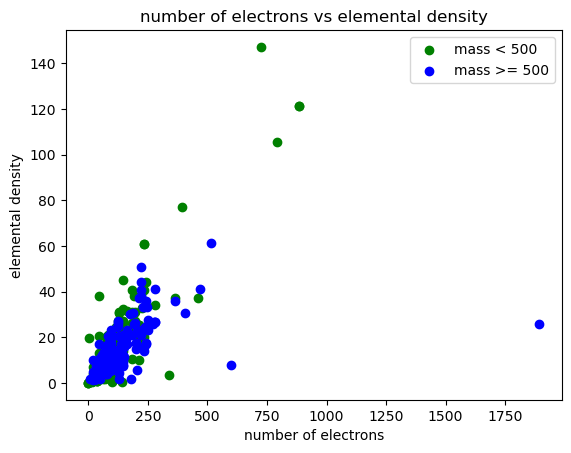

In [15]:
# Plotting two types of data points in the same subplot
soft_material = df[df['Hardness'] < 4.67] # data has hardness less than the mean
hard_material = df[df['Hardness'] >= 4.67] 

fig, ax = plt.subplots()

# plot the different data groups as different colors
ax.scatter(soft_material['allelectrons_Total'],\
           soft_material['density_Total'], color='green', label='mass < 500')
ax.scatter(hard_material['allelectrons_Total'], \
           hard_material['density_Total'], color='blue', label='mass >= 500')

ax.set_xlabel('number of electrons')
ax.set_ylabel('elemental density')
ax.set_title('number of electrons vs elemental density')
plt.legend() # add a legend

[<Axes: > <Axes: >]


Text(0, 0.5, 'Average atomic weight')

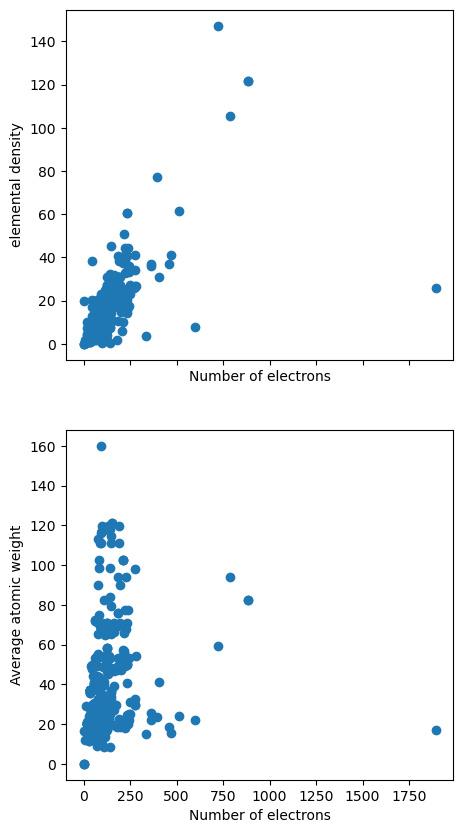

In [16]:
# subplots with 2 plots in two rows
fig, axes = plt.subplots(2,1, figsize=(5,10), sharex=True)

print(axes) # axes is now an array of axes objects instead of just one

# first plot
axes[0].scatter(df['allelectrons_Total'], df['density_Total'])
axes[0].set_xlabel('Number of electrons')
axes[0].set_ylabel('elemental density')

# second plot
axes[1].scatter(df['allelectrons_Total'], df['atomicweight_Average'])
axes[1].set_xlabel('Number of electrons')
axes[1].set_ylabel('Average atomic weight')

### 545 lecture 2 stopped here

In [30]:
df.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness,hardness_group
id,,,,,,,,,,,,,
6119,80.0,7.734660,10.000000,4.500000,20.255278,11.026725,2.7900,1.672500,0.852500,0.495275,0.82121,7.0,"(5.5, 7.75]"
3860,30.0,2.957992,12.000000,4.600000,24.033618,11.824480,2.6480,1.626000,0.912000,0.492736,1.31240,5.0,"(3.25, 5.5]"
6591,1894.0,25.982135,8.417778,5.333333,16.839527,13.265820,3.3216,1.556178,0.680356,0.504142,0.50430,4.8,"(3.25, 5.5]"
2158,100.0,0.973995,50.000000,4.000000,117.386335,9.013750,2.2950,2.045000,1.360000,0.426680,0.38618,2.5,"(0.991, 3.25]"
6852,58.0,4.663996,11.600000,4.800000,23.231818,11.177140,2.6750,1.736000,0.926000,0.491604,0.76486,4.0,"(3.25, 5.5]"


,hardness_group,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,"(0.991, 3.25]",152.223393,18.821277,23.765146,4.411462,54.352155,10.501204,2.468007,1.756065,0.999828,0.486067,3.223859,2.397984
1,"(3.25, 5.5]",125.422335,13.523065,15.490231,4.514364,33.617883,11.058684,2.621814,1.723959,0.933039,0.500164,1.900726,4.670337
2,"(5.5, 7.75]",114.522776,12.432111,13.681503,4.688485,29.125745,11.151916,2.701821,1.720644,0.914094,0.491752,1.567406,6.179905
3,"(7.75, 10.0]",76.544261,8.320307,11.069553,4.526101,23.082241,10.994770,2.620893,1.712611,0.905165,0.495770,1.237040,8.680851


#### Bar Plot

<Axes: xlabel='hardness_group'>

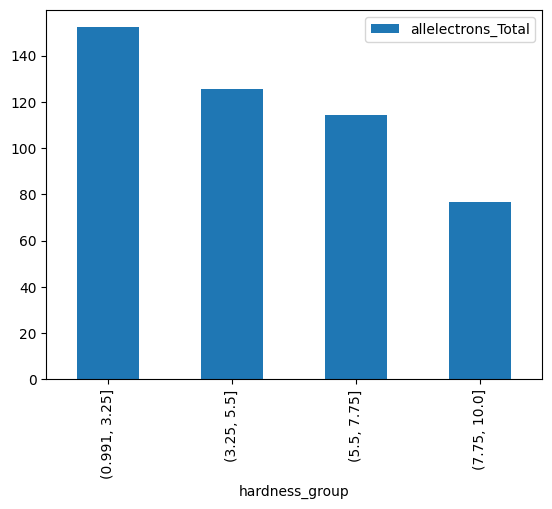

In [35]:
df2 = data.groupby(['hardness_group'], observed=True).mean().reset_index()

#plotting using pandas
df2.plot(kind='bar', x='hardness_group', y='allelectrons_Total')

<Axes: xlabel='hardness_group'>

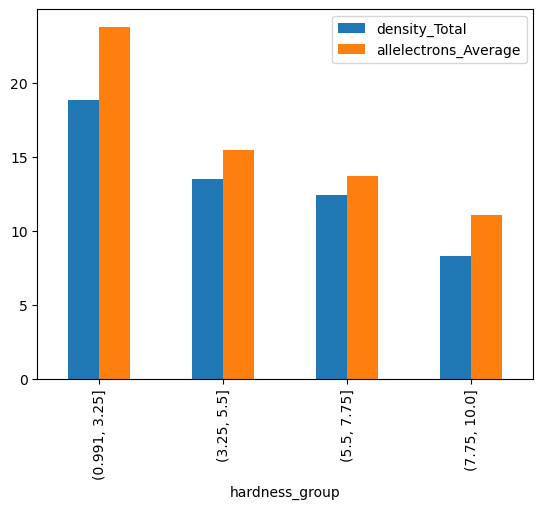

In [38]:
#plotting two columns in one bar plot
df2.iloc[:,[0,2,3]].plot(kind='bar', x='hardness_group')

In [39]:
df3 = data.groupby(['hardness_group'], observed=True).mean()
index_values = [str(x) for x in df3.index.values]

In [43]:
df3

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
hardness_group,,,,,,,,,,,,
"(0.991, 3.25]",152.223393,18.821277,23.765146,4.411462,54.352155,10.501204,2.468007,1.756065,0.999828,0.486067,3.223859,2.397984
"(3.25, 5.5]",125.422335,13.523065,15.490231,4.514364,33.617883,11.058684,2.621814,1.723959,0.933039,0.500164,1.900726,4.670337
"(5.5, 7.75]",114.522776,12.432111,13.681503,4.688485,29.125745,11.151916,2.701821,1.720644,0.914094,0.491752,1.567406,6.179905
"(7.75, 10.0]",76.544261,8.320307,11.069553,4.526101,23.082241,10.994770,2.620893,1.712611,0.905165,0.495770,1.237040,8.680851


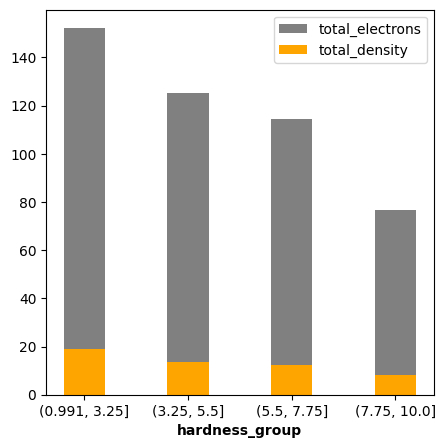

In [65]:
# ploting using matplotlib (stacked bar plots)
fig = plt.figure(figsize = (5, 5))
plt.bar(index_values, df3 ['allelectrons_Total'], width = 0.4, label ='total_electrons', color = 'grey')
plt.bar(index_values, df3['density_Total'], width = 0.4, label ='total_density', color = 'orange')
plt.xlabel('hardness_group', fontweight ='bold', fontsize = 10)
#plt.ylabel('electrons_total', fontweight ='bold', fontsize = 10)
plt.legend()

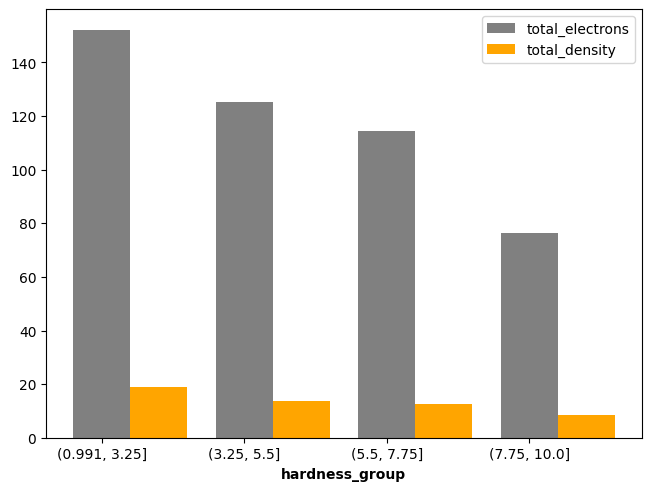

In [85]:
# ploting using matplotlib (unstacked bar plot with multiple columns)

fig, ax = plt.subplots(layout='constrained')
offset = 0.2
x1 = np.arange(len(df3.index))
x2 = x1 + offset
ax.bar(x1, df3 ['allelectrons_Total'], width = 0.4, label ='total_electrons', color = 'grey')
ax.bar(x2 + offset, df3['density_Total'], width = 0.4, label ='total_density', color = 'orange')
ax.set_xlabel('hardness_group', fontweight ='bold', fontsize = 10)
ax.set_xticks(x1, index_values) # Corrected line
ax.legend()

#### Histogram

<Axes: ylabel='Frequency'>

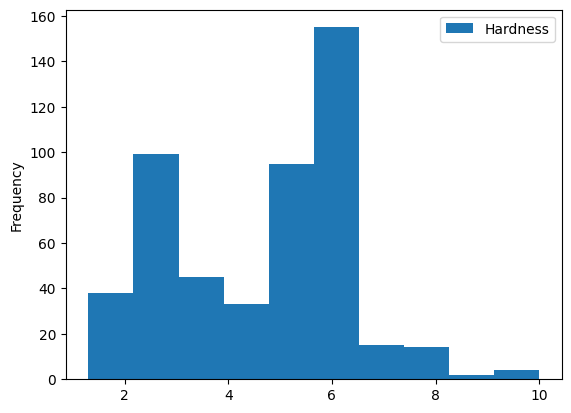

In [87]:
#ploting using pandas
df.plot(kind='hist', y='Hardness')

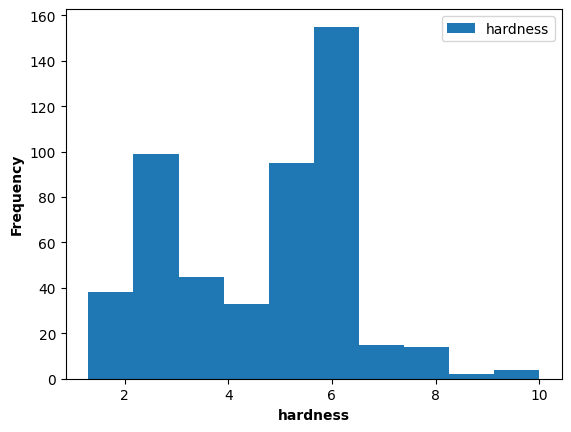

In [88]:
#ploting using matplotlib
plt.hist(df['Hardness'], label ='hardness')
plt.xlabel('hardness', fontweight ='bold', fontsize = 10)
plt.ylabel('Frequency', fontweight ='bold', fontsize = 10)
plt.legend()

#### Box Plot

<Axes: >

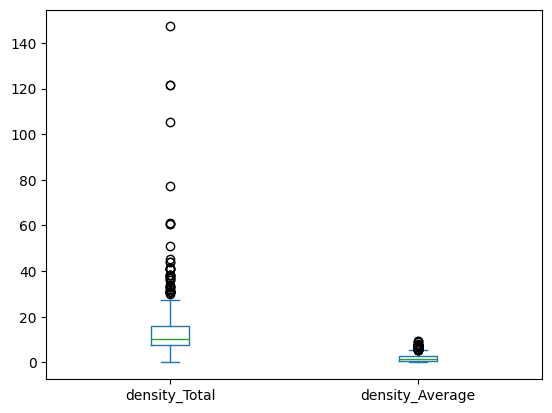

In [92]:
#ploting using pandas
df.plot(kind='box', y=['density_Total', 'density_Average'])

<Axes: >

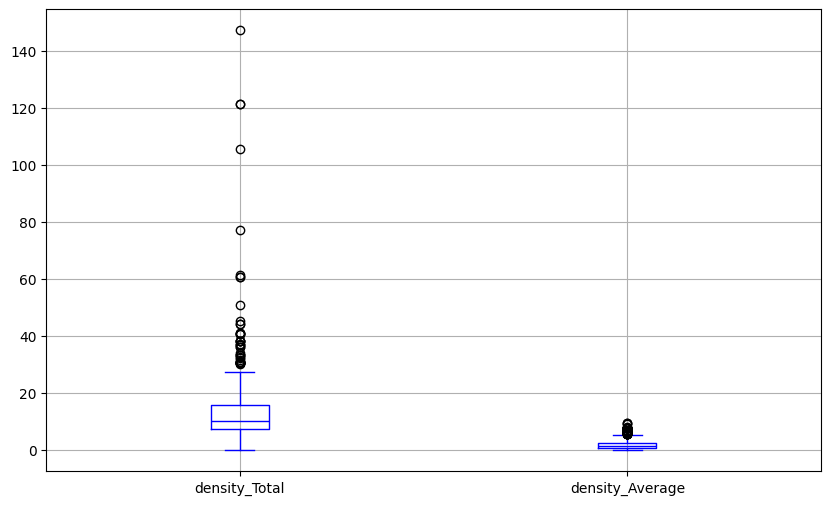

In [93]:
#plotting using matplotlib
df.boxplot(column=['density_Total', 'density_Average'], color='blue', figsize=(10, 6))


#### Pie chart

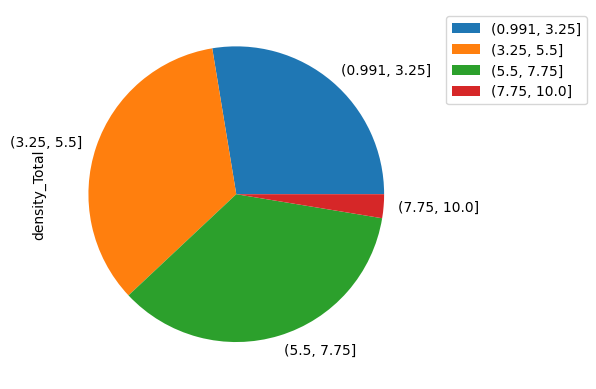

In [27]:
#plotting using pandas
df.groupby('hardness_group', observed = True).count().plot(kind='pie', y = 'density_Total')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left') # Specify desired location
plt.show()

In [21]:
df.groupby('hardness_group', observed = True).count()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
hardness_group,,,,,,,,,,,,
"(0.991, 3.25]",138,138,138,138,138,138,138,138,138,138,138,138
"(3.25, 5.5]",172,172,172,172,172,172,172,172,172,172,172,172
"(5.5, 7.75]",177,177,177,177,177,177,177,177,177,177,177,177
"(7.75, 10.0]",13,13,13,13,13,13,13,13,13,13,13,13


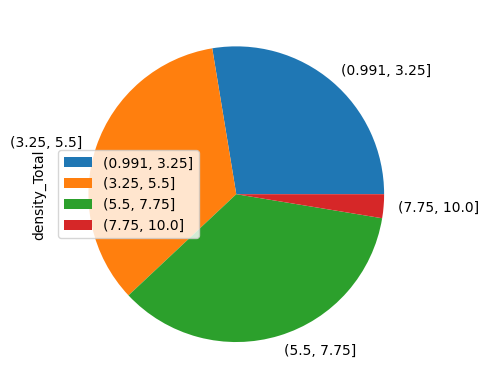

In [29]:
#plotting using matplotlib
df3 = df.groupby('hardness_group', observed = True).count()
plt.pie(df3['density_Total'], labels = df3.index)
plt.ylabel('density_Total')
plt.legend()

#### KDE plot

<Axes: ylabel='Density'>

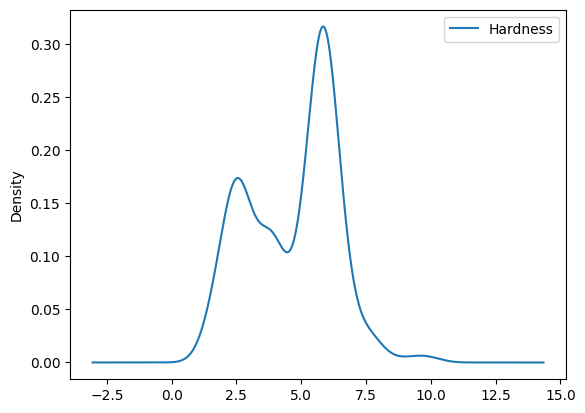

In [33]:
df.plot(kind='kde', y='Hardness')

#### Seaborn

In [34]:
import seaborn as sns


<Axes: xlabel='Hardness', ylabel='Density'>

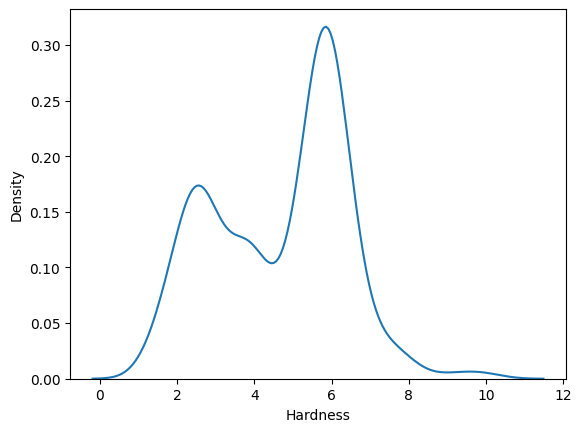

In [35]:
sns.kdeplot(df['Hardness'])

In [37]:
df.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness,hardness_group
id,,,,,,,,,,,,,
6119,80.0,7.734660,10.000000,4.500000,20.255278,11.026725,2.7900,1.672500,0.852500,0.495275,0.82121,7.0,"(5.5, 7.75]"
3860,30.0,2.957992,12.000000,4.600000,24.033618,11.824480,2.6480,1.626000,0.912000,0.492736,1.31240,5.0,"(3.25, 5.5]"
6591,1894.0,25.982135,8.417778,5.333333,16.839527,13.265820,3.3216,1.556178,0.680356,0.504142,0.50430,4.8,"(3.25, 5.5]"
2158,100.0,0.973995,50.000000,4.000000,117.386335,9.013750,2.2950,2.045000,1.360000,0.426680,0.38618,2.5,"(0.991, 3.25]"
6852,58.0,4.663996,11.600000,4.800000,23.231818,11.177140,2.6750,1.736000,0.926000,0.491604,0.76486,4.0,"(3.25, 5.5]"


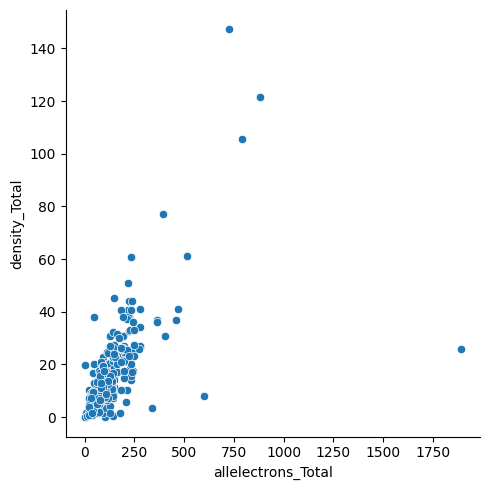

In [38]:
sns.relplot(kind = 'scatter', data = df, x="allelectrons_Total", y="density_Total")

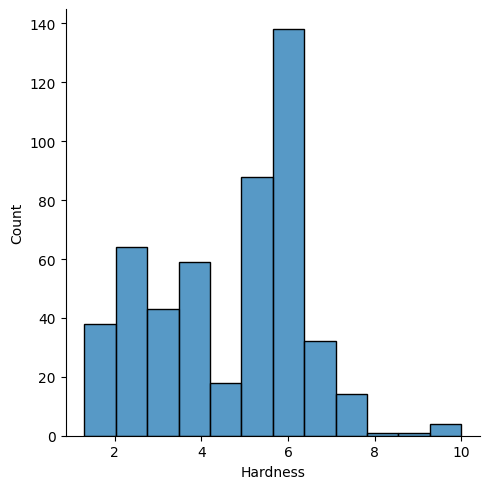

In [39]:
sns.displot(kind='hist', data = df, x ='Hardness')